Code running started at: 2024-10-30 18:35:15
---------------------------------------
Python Version: 3.9.19 | packaged by conda-forge | (main, Mar 20 2024, 12:38:46) [MSC v.1929 64 bit (AMD64)]
Python Executable: c:\Users\Monet\anaconda3\envs\bone-age\python.exe
Operating System: Windows 10
Platform: Windows-10-10.0.19045-SP0
Architecture: ('64bit', 'WindowsPE')
NumPy Version: 1.26.4
Pandas Version: 2.2.1
TensorFlow Version: 2.7.0
imblearn Version: 0.12.3
Matplotlib Version: 3.8.3
Current Working Directory: c:\Users\Monet\Desktop\EcoCurrentNet
Installed Packages:

Hardware Information:

Software Versions:
scikit-learn Version: 1.5.2
scipy Version: 1.13.0
Pillow Version: 10.3.0
jupyter is not installed.
seaborn Version: 0.13.2
keras Version: 2.7.0
matplotlib Version: 3.8.3
numpy Version: 1.26.4
tensorflow Version: 2.7.0
imblearn is not installed.
statsmodels is not installed.
xgboost Version: 2.1.2
lightgbm Version: 4.5.0
catboost Version: 1.2.7
optuna is not installed.
tensorflow_addon

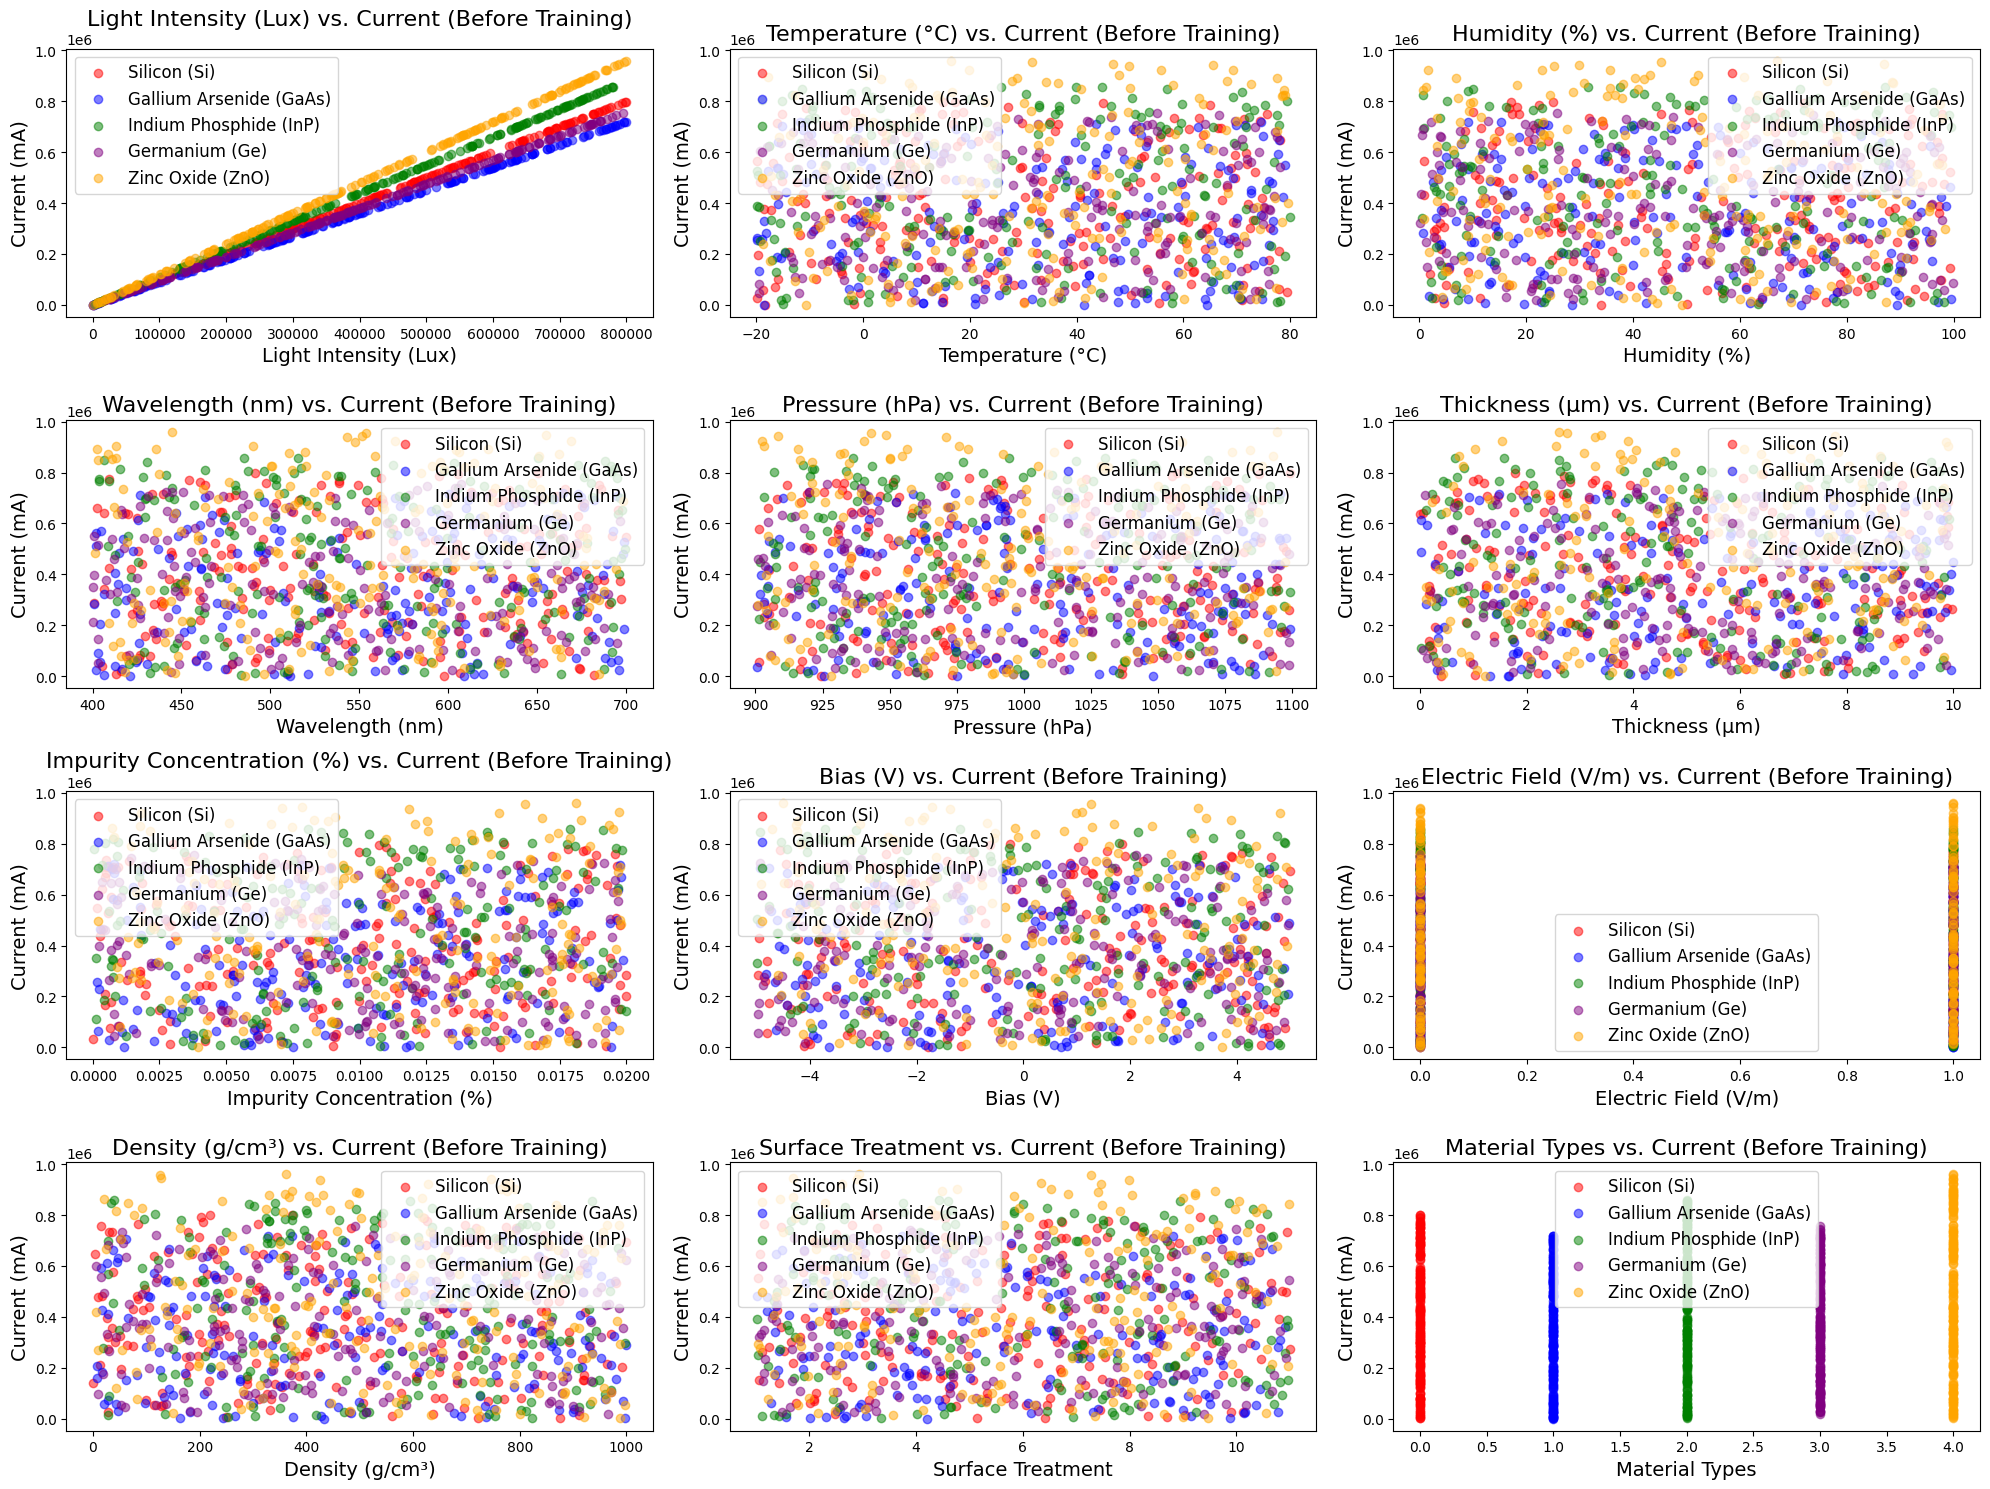

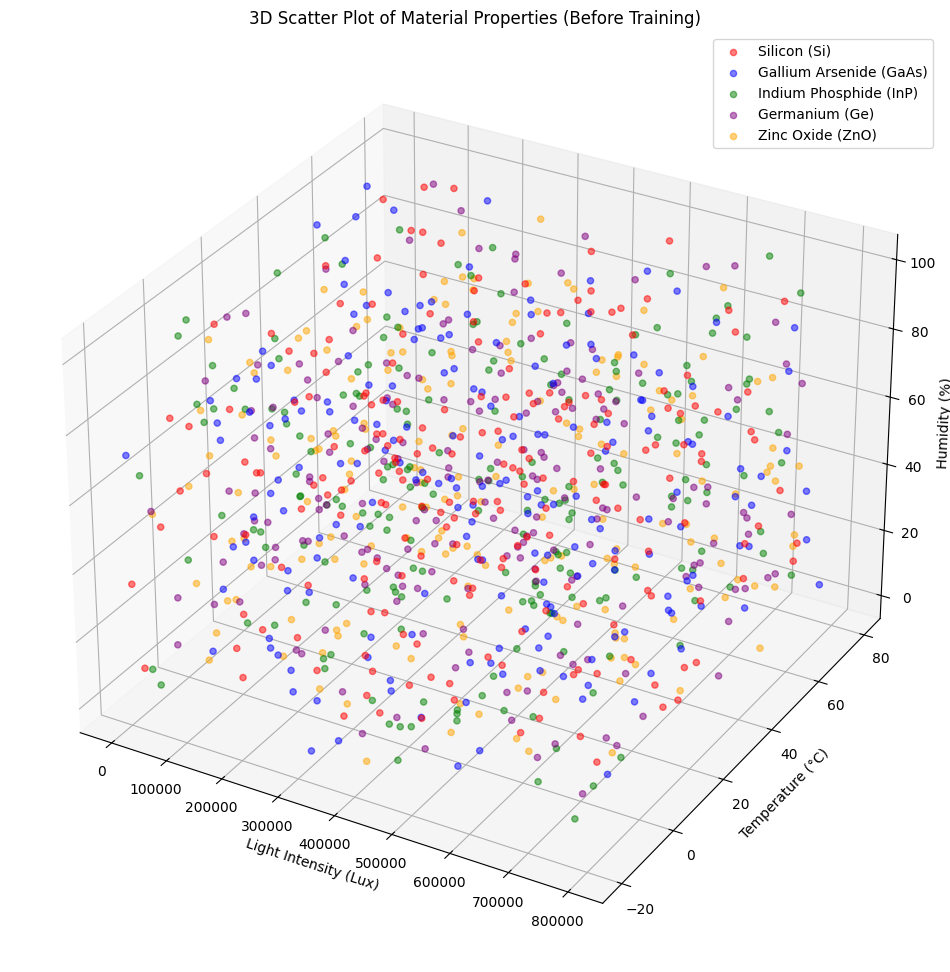

c:\Users\Monet\anaconda3\envs\bone-age\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.




EcoCurrentNet Metrics:
Root Mean Square Error: 13892.636304
Mean Squared Error: 193005343.486240
Mean Absolute Error: 10545.678225
R² Score: 0.996526
----------



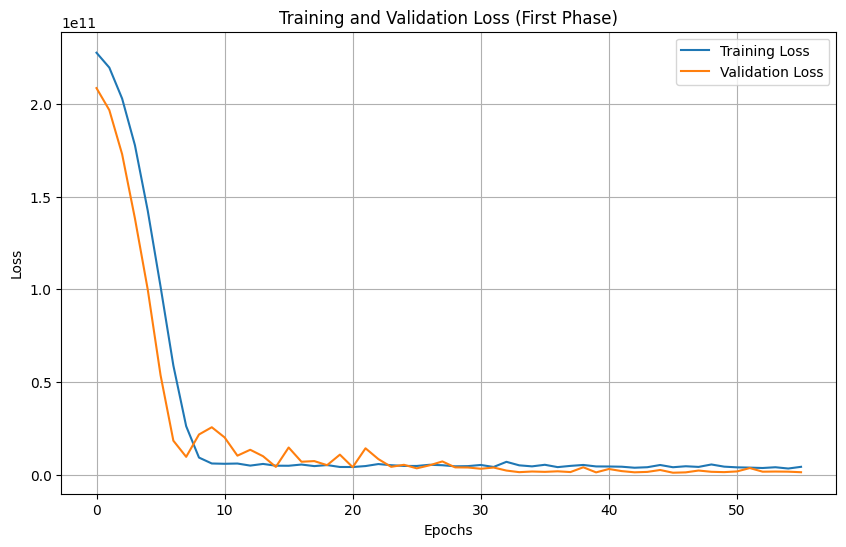

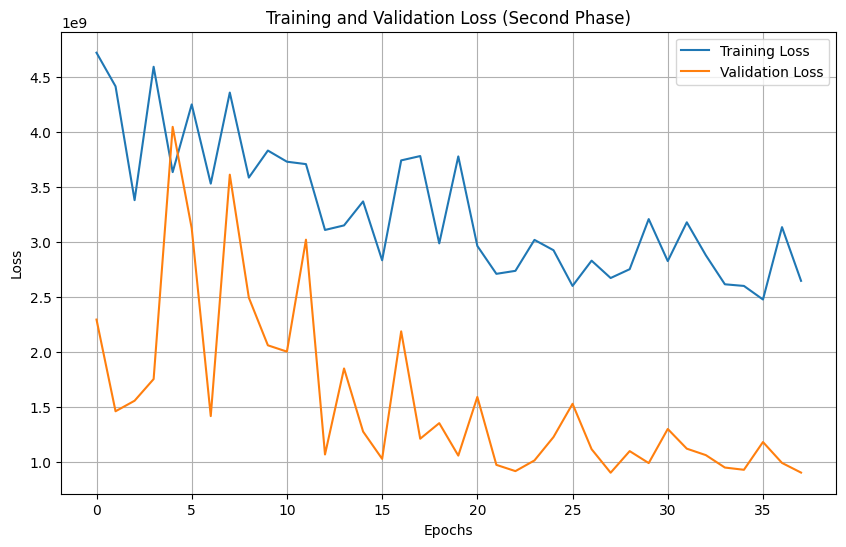

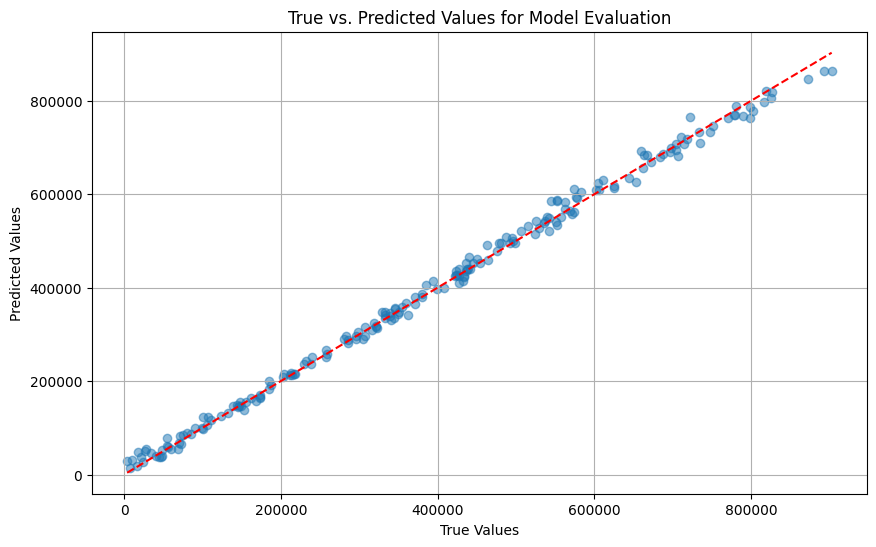

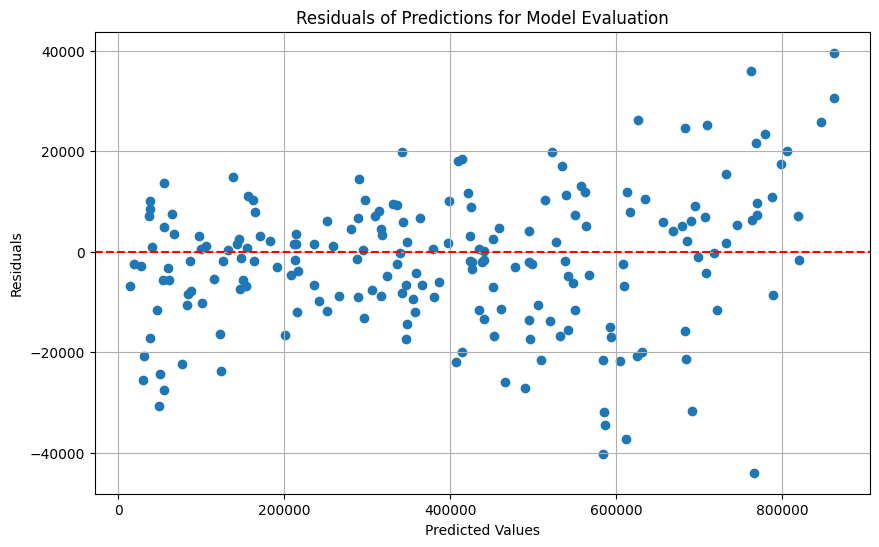

Code running ended at: 2024-10-30 18:35:41
---------------------------------------
Total execution time: 0:00:26.167730


In [26]:
import sys
import platform
import numpy as np
import pandas as pd
import tensorflow as tf
import imblearn
import matplotlib
import os
import subprocess
import pkg_resources
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

def print_environment_info():
    print("---------------------------------------")
    print("Python Version:", sys.version)
    print("Python Executable:", sys.executable)
    print("Operating System:", platform.system(), platform.release())
    print("Platform:", platform.platform())
    print("Architecture:", platform.architecture())
    print("NumPy Version:", np.__version__)
    print("Pandas Version:", pd.__version__)
    print("TensorFlow Version:", tf.__version__)
    print("imblearn Version:", imblearn.__version__)
    print("Matplotlib Version:", matplotlib.__version__)
    print("Current Working Directory:", os.getcwd())
    print("Installed Packages:")
    os.system("pip freeze")

    print("\nHardware Information:")
    try:
        if platform.system() == "Windows":
            subprocess.call(['wmic', 'csproduct', 'get', 'name'])
            subprocess.call(['wmic', 'cpu', 'get', 'name'])
        elif platform.system() == "Linux":
            subprocess.call(['cat', '/proc/cpuinfo'])
            subprocess.call(['lscpu'])
        elif platform.system() == "Darwin":
            subprocess.call(['sysctl', 'hw'])
    except Exception as e:
        print("Could not retrieve hardware information:", e)

    print("\nSoftware Versions:")
    packages = ['scikit-learn', 'scipy', 'Pillow', 'jupyter', 'seaborn',
        'keras','matplotlib','numpy','tensorflow','imblearn','statsmodels',
        'xgboost','lightgbm','catboost','optuna','tensorflow_addons','joblib',
        'tqdm']

    for package in packages:
        try:
            version = pkg_resources.get_distribution(package).version
            print(f"{package} Version: {version}")
        except pkg_resources.DistributionNotFound:
            print(f"{package} is not installed.")

start_time = datetime.now()
print("Code running started at:", start_time.strftime("%Y-%m-%d %H:%M:%S"))
print_environment_info()

import matplotlib.pyplot as plt

class OptoelectronicDataGenerator:
    def __init__(self, n_samples, I_s=0.5):
        self.n_samples = n_samples
        self.I_s = I_s
        self.material_properties = {
            0: {'name': 'Silicon (Si)', 'coefficient': 1.0},
            1: {'name': 'Gallium Arsenide (GaAs)', 'coefficient': 0.9},
            2: {'name': 'Indium Phosphide (InP)', 'coefficient': 1.1},
            3: {'name': 'Germanium (Ge)', 'coefficient': 0.95},
            4: {'name': 'Zinc Oxide (ZnO)', 'coefficient': 1.2}
        }

    def generate_data(self):
        light_intensity = np.random.rand(self.n_samples) * 800_000  # Light intensity: 0 to 800,000 Lux
        temperature = np.random.rand(self.n_samples) * 100 - 20  # Temperature: -20°C to 80°C
        material_types = np.random.randint(0, 5, self.n_samples)  # Five different materials (0-4)
        humidity = np.random.rand(self.n_samples) * 100  # Humidity: 0% to 100%
        wavelength = np.random.rand(self.n_samples) * 300 + 400  # Wavelength: 400 nm to 700 nm
        pressure = np.random.rand(self.n_samples) * 200 + 900  # Pressure: 900 hPa to 1100 hPa
        thickness = np.random.rand(self.n_samples) * 10  # Thickness: 0 to 10 µm
        impurity = np.random.rand(self.n_samples) * 0.02  # Impurity concentration: 0 to 2%
        bias = np.random.rand(self.n_samples) * 10 - 5  # Bias: -5V to 5V
        surface = np.random.randint(0, 2, self.n_samples)  # Surface treatment: 0 (none) or 1 (treated)
        electric_field = np.random.rand(self.n_samples) * 1000  # Electric field strength: 0 to 1000 V/m
        density = np.random.rand(self.n_samples) * 10 + 1  # Material density: 1 to 11 g/cm³

        X = np.column_stack((light_intensity, temperature, material_types, humidity,
                             wavelength, pressure, thickness, impurity, bias,
                             surface, electric_field, density))
        
        y = self._calculate_current(X, material_types)
        return X, y

    def _calculate_current(self, X, material_types):
        n = self.n_samples
        noise = np.random.normal(0, 0.1, n)  # Add noise
        current = np.zeros(n)
        
        for i in range(n):
            current[i] = (X[i, 0] * self.material_properties[material_types[i]]['coefficient'] +
                          X[i, 1] * 0.5 + 
                          X[i, 3] * 0.05 +
                          X[i, 4] * 0.002 + 
                          X[i, 5] * 0.001 +
                          X[i, 6] * 0.03 + 
                          X[i, 7] * 0.1 +
                          X[i, 8] * 0.2 + 
                          X[i, 9] * 0.3 +
                          X[i, 10] * 0.01 +  
                          X[i, 11] * 0.1 +           
                          self.I_s) + noise[i]
        
        return current

    def preprocess_data(self):
        X, y = self.generate_data()
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # Split into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        return X_train, X_val, y_train, y_val, X, y
    
# Create an instance of the data generator and generate data
data_generator = OptoelectronicDataGenerator(n_samples=1000)
X_train, X_val, y_train, y_val, X, y = data_generator.preprocess_data()

import matplotlib.pyplot as plt

def plot_material_properties_before_training(X, y, material_properties):
    # Extract features
    material_types = X[:, 2].astype(int)
    light_intensity = X[:, 0]
    temperature = X[:, 1]
    humidity = X[:, 3]
    wavelength = X[:, 4]
    pressure = X[:, 5]
    thickness = X[:, 6]
    impurity = X[:, 7]
    bias = X[:, 8]
    electric_field = X[:, 9]
    density = X[:, 10]
    surface = X[:, 11]
    
    # Define colors and labels
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    material_labels = [material_properties[i]['name'] for i in range(5)]

    plt.figure(figsize=(20, 15))

    # List of features and corresponding labels
    features = [
        (light_intensity, 'Light Intensity (Lux)'),
        (temperature, 'Temperature (°C)'),
        (humidity, 'Humidity (%)'),
        (wavelength, 'Wavelength (nm)'),
        (pressure, 'Pressure (hPa)'),
        (thickness, 'Thickness (µm)'),
        (impurity, 'Impurity Concentration (%)'),
        (bias, 'Bias (V)'),
        (electric_field, 'Electric Field (V/m)'),
        (density, 'Density (g/cm³)'),
        (surface, 'Surface Treatment'),
        (material_types, 'Material Types')
    ]
    
    for i, (feature_data, feature_label) in enumerate(features):
        plt.subplot(4, 3, i + 1) 
        for j in range(5):
            plt.scatter(feature_data[material_types == j], y[material_types == j], alpha=0.5, 
                        label=material_labels[j], color=colors[j])
        plt.title(f'{feature_label} vs. Current (Before Training)', fontsize=16)
        plt.xlabel(feature_label, fontsize=14)
        plt.ylabel('Current (mA)', fontsize=14)
        plt.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

plot_material_properties_before_training(X, y, data_generator.material_properties)

from mpl_toolkits.mplot3d import Axes3D

def plot_material_properties(X, y, material_properties):
    # Extract features
    material_types = X[:, 2].astype(int)
    light_intensity = X[:, 0]
    temperature = X[:, 1]
    humidity = X[:, 3]
    wavelength = X[:, 4]
    pressure = X[:, 5]
    thickness = X[:, 6]
    impurity = X[:, 7]
    bias = X[:, 8]
    electric_field = X[:, 9]
    density = X[:, 10]
    surface = X[:, 11]

    # Define colors and labels
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    material_labels = [material_properties[i]['name'] for i in range(5)]

    # Create a figure for 3D plotting
    fig = plt.figure(figsize=(12, 15))
    ax = fig.add_subplot(111, projection='3d')

    # Choose features for 3D plot (light intensity, temperature, humidity)
    x_data = light_intensity
    y_data = temperature
    z_data = humidity

    for j in range(5):
        ax.scatter(x_data[material_types == j], 
                   y_data[material_types == j], 
                   z_data[material_types == j], 
                   alpha=0.5, 
                   label=material_labels[j], 
                   color=colors[j])

    ax.set_title('3D Scatter Plot of Material Properties (Before Training)')
    ax.set_xlabel('Light Intensity (Lux)')
    ax.set_ylabel('Temperature (°C)')
    ax.set_zlabel('Humidity (%)')
    ax.legend()

    plt.show()

plot_material_properties(X, y, data_generator.material_properties)

import plotly.express as px

def plot_current_in_3D(X, y, material_properties):
    # Create a DataFrame for easier handling
    df = pd.DataFrame(X, columns=['Light Intensity', 'Temperature', 'Material Type', 'Humidity',
                                   'Wavelength', 'Pressure', 'Thickness', 'Impurity',
                                   'Bias', 'Electric Field', 'Density', 'Surface Treatment'])
    df['Current'] = y

    # Convert material types to categorical for color mapping
    df['Material Type'] = df['Material Type'].astype(int)

    # Plot with updated color scale
    fig = px.scatter_3d(df, 
                        x='Light Intensity', 
                        y='Temperature', 
                        z='Humidity', 
                        color='Material Type', 
                        size='Current', 
                        hover_name=df.index,
                        title='3D Scatter Plot of Current vs Features',
                        color_continuous_scale=px.colors.sequential.Plasma)

    fig.update_traces(marker=dict(sizemode='diameter', opacity=0.7), selector=dict(mode='markers'))
    fig.update_layout(scene=dict(
        xaxis_title='Light Intensity (Lux)',
        yaxis_title='Temperature (°C)',
        zaxis_title='Humidity (%)'
    ))

    fig.show()

plot_current_in_3D(X, y, data_generator.material_properties)

def plot_loss(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_true_vs_predicted(y_val, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val, y_pred, alpha=0.5)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid()
    plt.show()

def plot_residuals(y_val, y_pred, title):
    residuals = y_val - y_pred.flatten()
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred.flatten(), residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D, Add, Input
from keras.layers import LeakyReLU
from keras.models import Model
from catboost import CatBoostRegressor
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop

class CatBoostLayer(Model):
    def __init__(self, **kwargs):
        super(CatBoostLayer, self).__init__(**kwargs)
        self.catboost = CatBoostRegressor(silent=True)

    def fit(self, X, y):
        self.catboost.fit(X, y)

    def predict(self, X):
        return self.catboost.predict(X)

    def call(self, inputs):
        return self.predict(inputs)

def residual_block(x, filters):
    shortcut = x
    x = Conv1D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = Conv1D(filters, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, shortcut])
    return x

def EcoCurrentNet(input_shape, num_classes=5):
    model_inputs = Input(shape=(input_shape, 1))
    x = Conv1D(64, kernel_size=3, padding='same')(model_inputs)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # 添加残差块
    x = residual_block(x, 64)

    # 第二层卷积
    x = Conv1D(128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling1D(pool_size=2)(x)
    
    # 添加残差块
    x = residual_block(x, 128)

    # 第三层卷积
    x = Conv1D(256, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = MaxPooling1D(pool_size=2)(x)

    # 全局平均池化层
    x = GlobalAveragePooling1D()(x)
    
    # 全连接层
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    # 输出层
    outputs = Dense(1)(x)

    model = Model(inputs=model_inputs, outputs=outputs)
    catboost = CatBoostLayer()
    
    return model, catboost

def train(EcoCurrentNet, X_train, y_train, X_val, y_val, random_seed=0):
    # Create and compile the feedforward model
    model, catboost = EcoCurrentNet(X_train.shape[1])
    
    # Define checkpoint filepath here
    checkpoint = './EcoCurrentNet_best_model.h5'
        
    # Set callback functions
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    model_checkpoint = ModelCheckpoint(checkpoint, 
                                        monitor='val_loss', 
                                        save_best_only=True, 
                                        mode='min', 
                                        verbose=0)

    # Compile model with RMSprop optimizer
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mean_squared_error')

    # Train the feedforward model
    history_first = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                              epochs=300, batch_size=32, callbacks=[early_stopping, model_checkpoint], 
                              verbose=0)

    # Get the best epoch and corresponding validation loss from the first round
    best_epoch_first = np.argmin(history_first.history['val_loss']) + 1
    best_val_loss_first = min(history_first.history['val_loss'])
    
    # Train the feedforward model for the second time
    history_second = model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                               epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr, model_checkpoint], 
                               verbose=0)

    # Get the best epoch and corresponding validation loss from the second round
    best_epoch_second = np.argmin(history_second.history['val_loss']) + 1
    best_val_loss_second = min(history_second.history['val_loss'])

    # Use EcoCurrentNet的输出数据作为新的目标变量
    y_train_nn = model.predict(X_train)  # Changed this to use the model instead of feedforward_model
    
    # Fit the CatBoost model
    catboost.fit(X_train, y_train_nn)

    # Make predictions and evaluate
    y_pred_catboost = catboost.predict(X_val)  # Changed this to use catboost instead of catboost_model
    r2 = r2_score(y_val, y_pred_catboost)

    # Calculate additional metrics for CatBoost
    mse = mean_squared_error(y_val, y_pred_catboost)
    mae = mean_absolute_error(y_val, y_pred_catboost)
    rmse = np.sqrt(mse)

    # Print metrics for CatBoost model
    print(f'\nEcoCurrentNet Metrics:')
    print(f'Root Mean Square Error: {rmse:.6f}')
    print(f'Mean Squared Error: {mse:.6f}')
    print(f'Mean Absolute Error: {mae:.6f}')
    print(f'R² Score: {r2:.6f}')
    print('----------\n')
    
    # Save metrics to checkpoint
    metrics = {
        'RMSE': rmse,
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }
    
    # Save metrics to a DataFrame
    metrics_df = pd.DataFrame([metrics])
    metrics_file_path = os.path.join('./EcoCurrentNet_metrics.xlsx')
    
    # Plot history
    plot_loss(history_first, title='Training and Validation Loss (First Phase)')
    plot_loss(history_second, title='Training and Validation Loss (Second Phase)')

    # Call the function to plot True vs. Predicted values after model evaluation
    plot_true_vs_predicted(y_val, y_pred_catboost, title='True vs. Predicted Values for Model Evaluation')

    # Call the function to plot residuals after model evaluation
    plot_residuals(y_val, y_pred_catboost, title='Residuals of Predictions for Model Evaluation')

    # Return metrics for further analysis
    return rmse, mse, mae, r2, (best_epoch_first, best_val_loss_first), (best_epoch_second, best_val_loss_second), y_pred_catboost, X_val

rmse, mse, mae, r2, (best_epoch_first, best_val_loss_first), (best_epoch_second, best_val_loss_second), y_pred_catboost, X_val = train(
    EcoCurrentNet,
    X_train,
    y_train,
    X_val,
    y_val
)

end_time = datetime.now()
print("Code running ended at:", end_time.strftime("%Y-%m-%d %H:%M:%S"))
print("---------------------------------------")

execution_time = end_time - start_time
print("Total execution time:", execution_time)